In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Machine Learning Online Class - Exercise 1: Linear Regression
def warmUpExercise():
    """
    예제 함수인데 5x5 identity 행렬을 반환한다.
    """
    
    # ============= YOUR CODE HERE ==============
    A = np.eye(5)
    
    return A

#  ==================== Part 1: Basic Function ====================
print('Running warmUpExercise ... ')
print('5x5 Identity Matrix: ')

print(warmUpExercise())

Running warmUpExercise ... 
5x5 Identity Matrix: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [3]:
data=np.loadtxt("ex1data1.txt",delimiter=",")
X=data[:,0]
m=np.size(X)
y=data[:,1].reshape((m,1))
X=X.reshape((m,1))

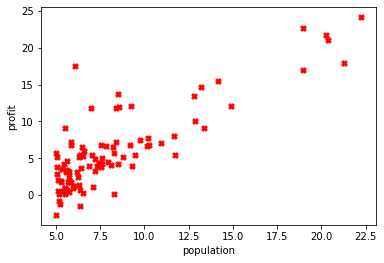

In [4]:
def plotData(X,y):
    plt.figure()
    plt.scatter(X,y,marker='X',c='r',s=30)
    plt.ylabel("profit")
    plt.xlabel("population")
    #plt.show()

plotData(X,y)

In [5]:
X=np.hstack((np.ones((m,1)),X))


In [6]:
theta=np.zeros((2,1))

In [7]:
def computeCost(X,y,theta):
    m=np.size(y)
    prediction=X.dot(theta)
    error=prediction-y
    J=1.0/(2.0*m)*(np.sum(error**2))
    return J
computeCost(X,y,theta)




32.072733877455676

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):

    J_history=[0]*(num_iters)
    for i in range(num_iters):
        prediction=X.dot(theta)
        error=prediction-y
        delta=1.0/m*(error.T).dot(X)
        theta=theta-alpha*(delta.T)
        J_history[i]=computeCost(X,y,theta)
        
    return theta, J_history

In [9]:
alpha=0.01
num_iters=1500

theta,J_history=gradientDescent(X,y,theta,alpha,num_iters)
predict1=np.array([[1,3.5]])*theta.T
predict2=np.array([[1,7]])*theta.T
print(predict1.sum()*10000,predict2.sum()*10000)



4519.7678677017675 45342.45012944712


[[-3.63029144]
 [ 1.16636235]]
[[31.36057907]
 [-3.63029144]]


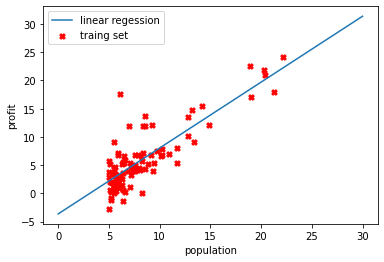

In [10]:
plotData(X[:,1],y)
k=np.array([[1,30],[1,0]])
print(theta)
print(k.dot(theta))
plt.plot(k[:,1],k.dot(theta),"-")
plt.legend(("linear regession","traing set"))
plt.show()


In [11]:
data=np.loadtxt("ex1data2.txt",delimiter=",")
X=data[:,0:2]
m=np.size(X[:,0])
X=X.reshape((m,2))
y=data[:,2].reshape((m,1))


In [12]:
def featureNormalize(X):
    mean=X.mean(axis=0)
    sigma=X.std(axis=0)
    X=(X-mean)/sigma
    m=np.size(X[:,0])
    X=np.hstack((np.ones((m,1)),X))
    return X,mean,sigma

In [13]:
X,mu,sigma=featureNormalize(X)

In [14]:
def computeCostMulti(X, y, theta):
    m=np.size(y)
    prediction=X.dot(theta)
    error=prediction-y
    J=1.0/(2.0*m)*(np.sum(error**2))

    return J


In [15]:
theta=np.zeros((3,1))
computeCostMulti(X,y,theta)

65591548106.45744

In [16]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history=[0]*num_iters
    m=np.size(y)
    for i in range(num_iters):
        prediction=X.dot(theta)
        error=prediction-y
        delta=1.0/m*(error.T.dot(X))
        theta=theta-alpha*delta.T
        J_history[i]=computeCostMulti(X,y,theta)
    return theta,J_history

Running gradient descent ...


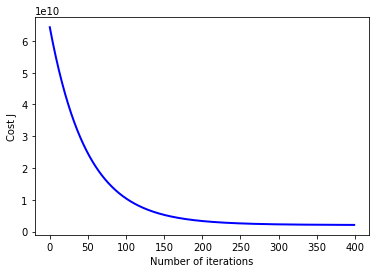

Theta computed from gradient descent: 
 [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [17]:
print('Running gradient descent ...')
theta=np.zeros((3,1))
# 몇몇 alpha 값을 선택한다.
alpha = 0.01
num_iters = 400

# Theta를 초기화하고 Gradient descent를 실행한다.
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# convergence graph를 plot한다.
plt.plot(J_history, '-b', lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# gradient descent의 결과를 출력한다.
print('Theta computed from gradient descent: ')
print(' %s' % theta)